In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('train.csv',header=None)
ds = pd.read_csv('train.csv',header=None)
ds.head()

,0,1,2,3,4,5,6,7,8
0,ID_1,-64,-56,-61,-66,-71,-82,-81,1
1,ID_2,-68,-57,-61,-65,-71,-85,-85,1
2,ID_3,-63,-60,-60,-67,-76,-85,-84,1
3,ID_4,-61,-60,-68,-62,-77,-90,-80,1
4,ID_5,-63,-65,-60,-63,-77,-81,-87,1


In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

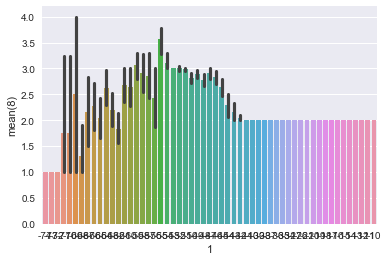

In [8]:
sb.barplot(x=1,y=8,data=ds)

In [9]:
colors=[]
for i in ds[8]:
    if i==1:
        colors.append('red')
    elif i==2:
        colors.append('blue')
    elif i==3:
        colors.append('green')
    else:
        colors.append('yellow')

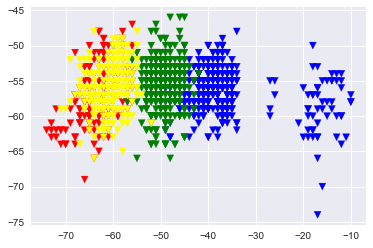

In [10]:
plt.scatter(ds[1],ds[2],c=colors,marker='v')

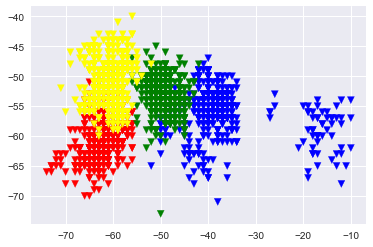

In [11]:
plt.scatter(ds[1],ds[3],c=colors,marker='v')

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
# Not to be run again
X=df
del(X[0])
del(X[8])
Y=ds[8]

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.25,random_state=27)

In [29]:
X_train.head()

,1,2,3,4,5,6,7
46,-65,-58,-62,-67,-77,-86,-91
1431,-60,-60,-46,-54,-49,-81,-83
1432,-58,-57,-46,-55,-50,-87,-85
221,-57,-56,-54,-69,-75,-83,-81
1091,-51,-55,-51,-48,-63,-88,-84


In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
p = model.predict(X_test)

In [15]:
metrics.accuracy_score(Y_test,p)

0.96533333333333338

In [16]:
print(metrics.classification_report(Y_test,p))

             precision    recall  f1-score   support

          1       0.98      0.98      0.98        91
          2       0.96      0.96      0.96        91
          3       0.93      0.94      0.93        94
          4       1.00      0.99      0.99        99

avg / total       0.97      0.97      0.97       375



In [17]:
from sklearn import svm

In [18]:
svm_mod = svm.SVC()

In [19]:
svm_mod.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
p_svm = svm_mod.predict(X_test)

In [21]:
metrics.accuracy_score(Y_test,p_svm)

0.75466666666666671

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k_mod = KNeighborsClassifier(n_neighbors=7)

In [24]:
k_mod.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [25]:
p_knn = k_mod.predict(X_test)

In [26]:
metrics.accuracy_score(Y_test,p_knn)

0.98133333333333328

In [27]:
print(metrics.classification_report(Y_test,p_knn))

             precision    recall  f1-score   support

          1       0.99      1.00      0.99        91
          2       0.99      0.95      0.97        91
          3       0.95      0.99      0.97        94
          4       1.00      0.99      0.99        99

avg / total       0.98      0.98      0.98       375



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rndm_mod = RandomForestClassifier(n_estimators=11)

In [30]:
rndm_mod.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=11, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
p_rndm = rndm_mod.predict(X_test)

In [32]:
metrics.accuracy_score(Y_test,p_rndm)

0.98133333333333328

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
nn_mod = MLPClassifier(hidden_layer_sizes=(800,600),max_iter=60,activation='relu')

In [35]:
nn_mod.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800, 600), learning_rate='constant',
       learning_rate_init=0.001, max_iter=60, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [36]:
nn_mod.n_layers_

4

In [37]:
p_nn = nn_mod.predict(X_test)

In [38]:
metrics.accuracy_score(Y_test,p_nn)

0.96266666666666667

In [39]:
print(metrics.classification_report(Y_test,p_nn))

             precision    recall  f1-score   support

          1       1.00      0.99      0.99        91
          2       0.93      0.96      0.94        91
          3       0.93      0.91      0.92        94
          4       0.99      0.99      0.99        99

avg / total       0.96      0.96      0.96       375



In [33]:
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB

In [34]:
gnb = GaussianNB()

In [35]:
gnb.fit(X_train,Y_train)

GaussianNB(priors=None)

In [36]:
p_gnb = gnb.predict(X_test)

In [37]:
metrics.accuracy_score(Y_test,p_gnb)

0.98133333333333328

In [38]:
mnb = MultinomialNB()

In [39]:
df[[i for i in range(1,8)]].min()

1   -74
2   -74
3   -73
4   -77
5   -89
6   -97
7   -98
dtype: int64

In [47]:
X_mnb = pd.DataFrame([])
for i in range(1,8):
    X_mnb[i] = 100 + X[i]

In [48]:
X_mnb.head()

,1,2,3,4,5,6,7
0,36,44,39,34,29,18,19
1,32,43,39,35,29,15,15
2,37,40,40,33,24,15,16
3,39,40,32,38,23,10,20
4,37,35,40,37,23,19,13


In [4]:
X_train_mnb , X_test_mnb , Y_train_mnb , Y_test_mnb = train_test_split(X_mnb,Y,test_size=.25,random_state=42)

NameError: name 'train_test_split' is not defined

In [50]:
mnb.fit(X_train_mnb,Y_train_mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
p_mnb = mnb.predict(X_test)

In [52]:
metrics.accuracy_score(Y_test,p_mnb)

0.26400000000000001

In [53]:
X_train_mnb.head()

,1,2,3,4,5,6,7
807,51,47,47,49,36,21,20
1229,37,41,47,30,54,14,12
1480,36,42,53,39,48,15,14
1436,39,48,51,42,49,9,16
179,40,48,49,41,27,21,19


In [54]:
bnb = BernoulliNB()

In [55]:
bnb.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [56]:
p_bnb = bnb.predict(X_test)

In [57]:
metrics.accuracy_score(Y_test,p_bnb)

0.24266666666666667

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbc = GradientBoostingClassifier()

In [41]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [42]:
pre_gbc = gbc.predict(X_test)

In [43]:
metrics.accuracy_score(Y_test, pre_gbc)

0.97333333333333338